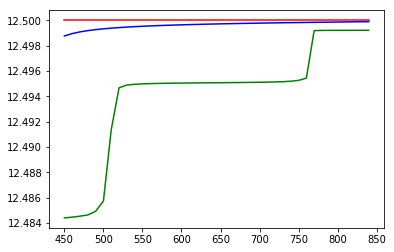

In [2]:
import numpy as np;

def DFT_mat(N):
    D1 = np.zeros((N,N));
    D1 = np.matrix(D1,dtype=complex);
    D2 = np.zeros((N,N));
    D2 = np.matrix(D2,dtype=complex);
    for k in range(N):
        for n in range(N):
            D1[k,n] = np.e**((-2*np.pi*k*n*complex(0,1))/N);
            D2[k,n] = np.e**((2*np.pi*k*n*complex(0,1))/N);
    D1 = np.round(D1, decimals = 6);
    D2 = np.round(D2/N, decimals = 6);
    #D2 = np.transpose(D2);
    return D1,D2;

def DCT_mat(N):
    D1 = np.zeros((N,N));
    D1 = np.matrix(D1);
    D2 = np.zeros((N,N));
    D2 = np.matrix(D2);
    for k in range(N):
        for n in range(N):
            D1[k,n] = 2*np.cos(np.pi*k*((2*n)+1)/(2*N));
            if(k==0):
                D2[k,n] = (1/2)*np.cos(np.pi*k*((2*n)+1)/(2*N));
            else:
                D2[k,n] = np.cos(np.pi*k*((2*n)+1)/(2*N));
    D2 = np.transpose(D2);
    D1 = np.round(D1, decimals = 6);
    D2 = np.round(D2/N, decimals = 6);
    return D1,D2;

def HAAR_mat(N): 
    H = np.matrix([[1, 1],
                    [1, -1]]);
    H_pre = H;
    
    for v in range(1,int(np.log2(N))):
        
        I_pre = np.matrix(np.identity(2**v));
        I_pre = (2**(v/2))*I_pre;
        I_pre = np.kron(I_pre,[1, -1]);
        H_pre = np.kron(H_pre,[1, 1]);
        H = np.concatenate((H_pre,I_pre));
        H_pre = H;
    H = np.round(H, decimals = 6);
    return H,np.transpose(H)/N;

length = 1024;
t = np.transpose(np.matrix(np.arange(length)))/length;
x = np.zeros((length,1));
for i in range(300,700):
    x = x + np.sin(2*np.pi*i*t);

def DFT_func(x):
    N = np.size(x);
    X = np.zeros((N,1));
    X = np.matrix(X,dtype=complex);
    [D1,D2]  = DFT_mat(N);
    X = D1*x;
    return X,D1,D2;

def DCT_func(x):
    N = np.size(x);
    X = np.zeros((N,1));
    X = np.matrix(X);
    [D1,D2]  = DCT_mat(N);
    X = D1*x;
    return X,D1,D2;

def HAAR_func(x):
    N = np.size(x);
    X = np.zeros((N,1));
    X = np.matrix(X);
    [D1,D2]  = HAAR_mat(N);
    X = D1*x;
    return X,D1,D2;

[X_dft,D_dft,ID_dft] = DFT_func(x);
[X_dct,D_dct,ID_dct] = DCT_func(x);
[X_haar,D_haar,ID_haar] = HAAR_func(x);


def DFT_appr(x,X,D2,L):
    N = np.size(x);
    
    for k in range(N):
        if ((k >= ((N+1-L)/2)) and (k <= ((N-1+L)/2))):
            X[k,0] = 0;
    xm = (D2*X)/N;
    E = np.abs(x - xm);
    E = np.transpose(E)*E;
    E = E/N;
    return E[0,0];

def DCT_appr(x,X,D2,L):
    N = np.size(x);
    
    for k in range(N):
        if ((k >= (N-L)) and (k <= (N-1))):
            X[k,0] = 0;
    xm = (D2*X)/N;
    E = x - xm;
    E = np.transpose(E)*E;
    E = E/N;
    return E[0,0];
            
def HAAR_appr(x,X,D2,L):
    N = np.size(x);
    
    for k in range(N):
        if ((k >= (N-L)) and (k <= (N-1))):
            X[k,0] = 0;
    xm = (D2*X)/N;
    E = x - xm;
    E = np.transpose(E)*E;
    E = E/N;
    return E[0,0];

import matplotlib.pyplot as plt

l = 450;
u = 850;
s = 10;

t2 = np.arange(l,u,s);

E_DFT = np.zeros((int((u-l)/s),1));
E_DCT = np.zeros((int((u-l)/s),1));
E_HAAR = np.zeros((int((u-l)/s),1));


for L in range(l,u,s):
    E_DFT[int((L-l)/s),0] = DFT_appr(x,X_dft,ID_dft,L); 
    E_DCT[int((L-l)/s),0] = DCT_appr(x,X_dct,ID_dct,L); 
    E_HAAR[int((L-l)/s),0] = HAAR_appr(x,X_haar,ID_haar,L); 

plt.plot(t2, E_DFT, 'r', t2, E_DCT, 'b', t2, E_HAAR, 'g');
plt.show();